In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv", 
                 index_col = ["date", "iso_code"], 
                 parse_dates = True)
df.rename(columns = {col:col.replace("_", " ").title() for col in df}, 
                     inplace = True)
countries = df.groupby("iso_code").mean().index

countries2 = df.groupby(["iso_code", "Location"]).mean().index
iso_to_country = dict(countries2)

In [2]:
keys = list(df.keys())[4:]
keys.remove("Tests Units")


In [3]:
list(df.keys())

['Continent',
 'Location',
 'Total Cases',
 'New Cases',
 'New Cases Smoothed',
 'Total Deaths',
 'New Deaths',
 'New Deaths Smoothed',
 'Total Cases Per Million',
 'New Cases Per Million',
 'New Cases Smoothed Per Million',
 'Total Deaths Per Million',
 'New Deaths Per Million',
 'New Deaths Smoothed Per Million',
 'Reproduction Rate',
 'Icu Patients',
 'Icu Patients Per Million',
 'Hosp Patients',
 'Hosp Patients Per Million',
 'Weekly Icu Admissions',
 'Weekly Icu Admissions Per Million',
 'Weekly Hosp Admissions',
 'Weekly Hosp Admissions Per Million',
 'New Tests',
 'Total Tests',
 'Total Tests Per Thousand',
 'New Tests Per Thousand',
 'New Tests Smoothed',
 'New Tests Smoothed Per Thousand',
 'Positive Rate',
 'Tests Per Case',
 'Tests Units',
 'Total Vaccinations',
 'People Vaccinated',
 'People Fully Vaccinated',
 'Total Boosters',
 'New Vaccinations',
 'New Vaccinations Smoothed',
 'Total Vaccinations Per Hundred',
 'People Vaccinated Per Hundred',
 'People Fully Vaccinated P

In [4]:
pivot_df = {}
for key in keys:
    pivot_df[key] = pd.pivot_table(df.reset_index(), 
                                   values=[key],
                                   index=['date'],
                                   columns=['iso_code'])
    pivot_df[key] = pivot_df[key].T.reset_index().set_index("iso_code")
    drop_key = list(pivot_df.keys())[0]
    del pivot_df[key]["level_0"]
    pivot_df[key] = pivot_df[key].T 
    

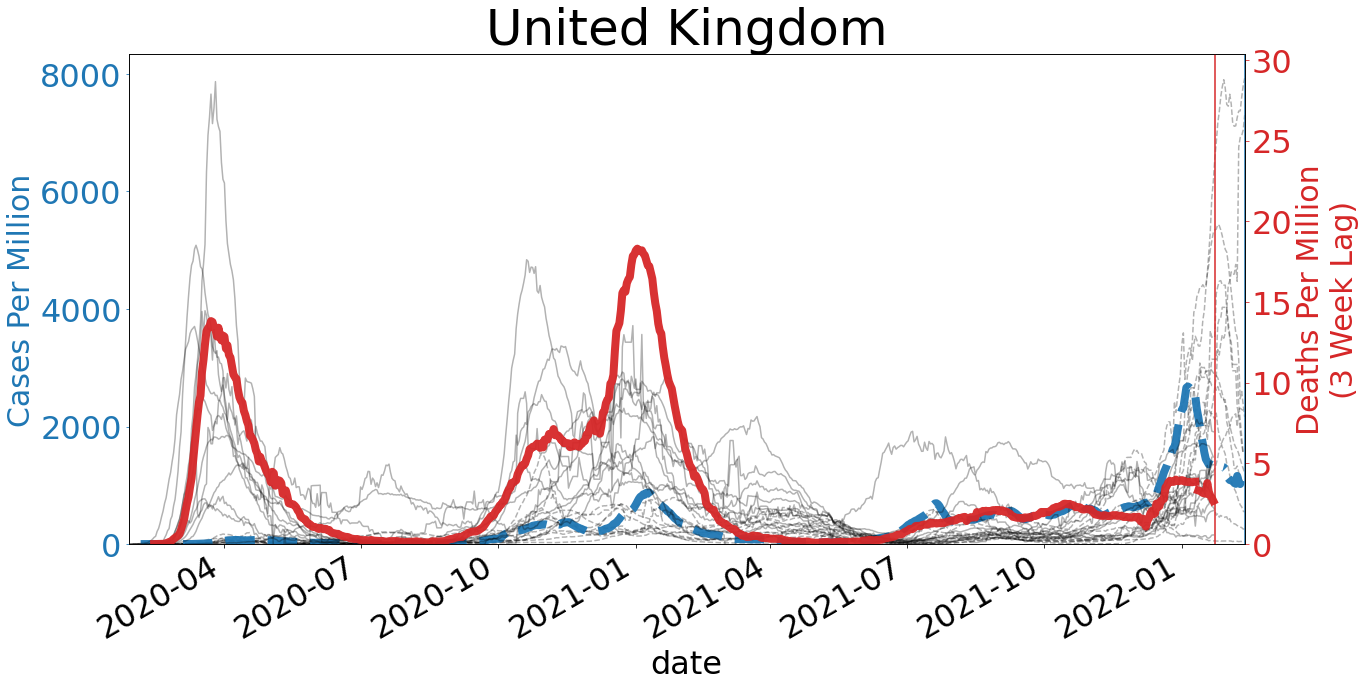

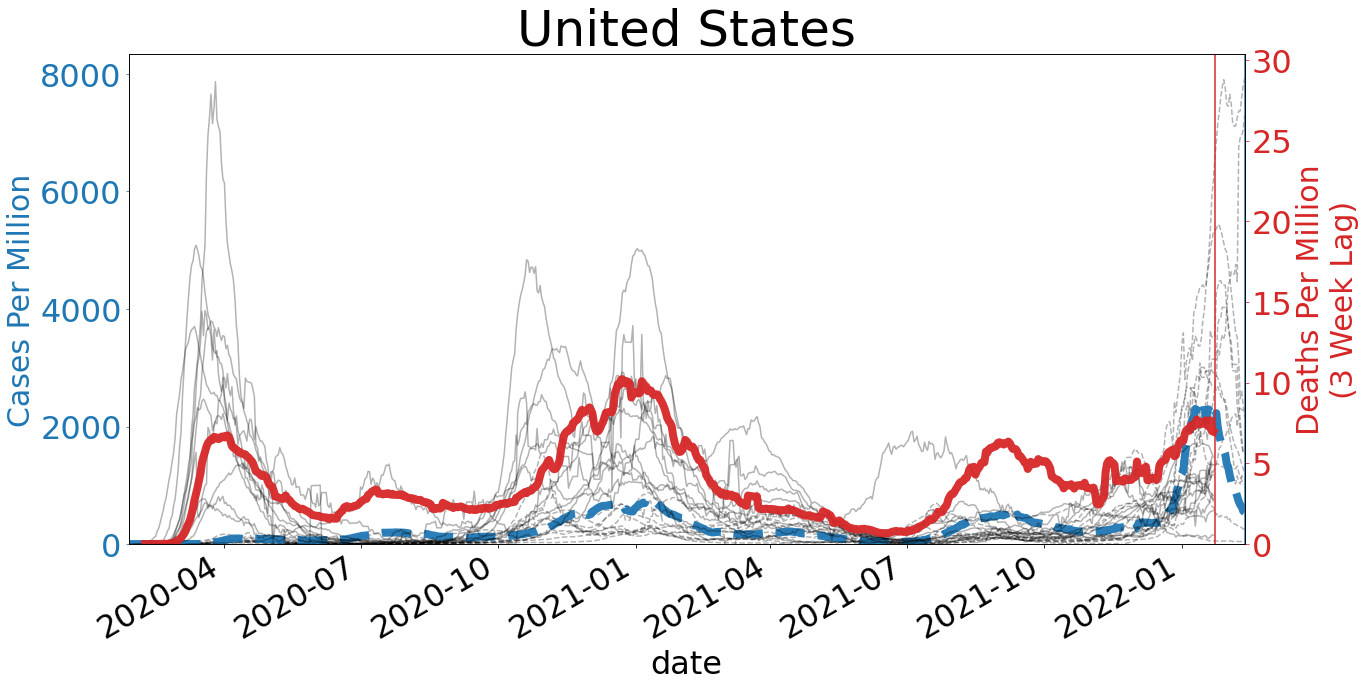

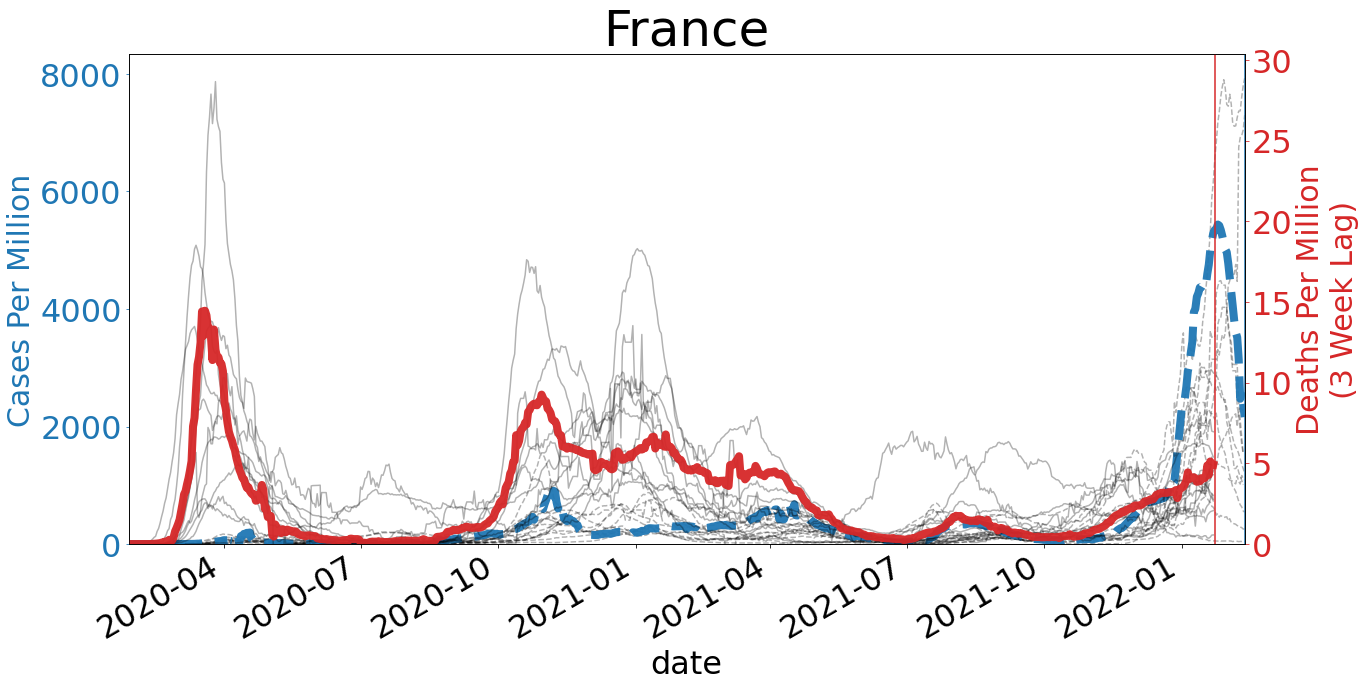

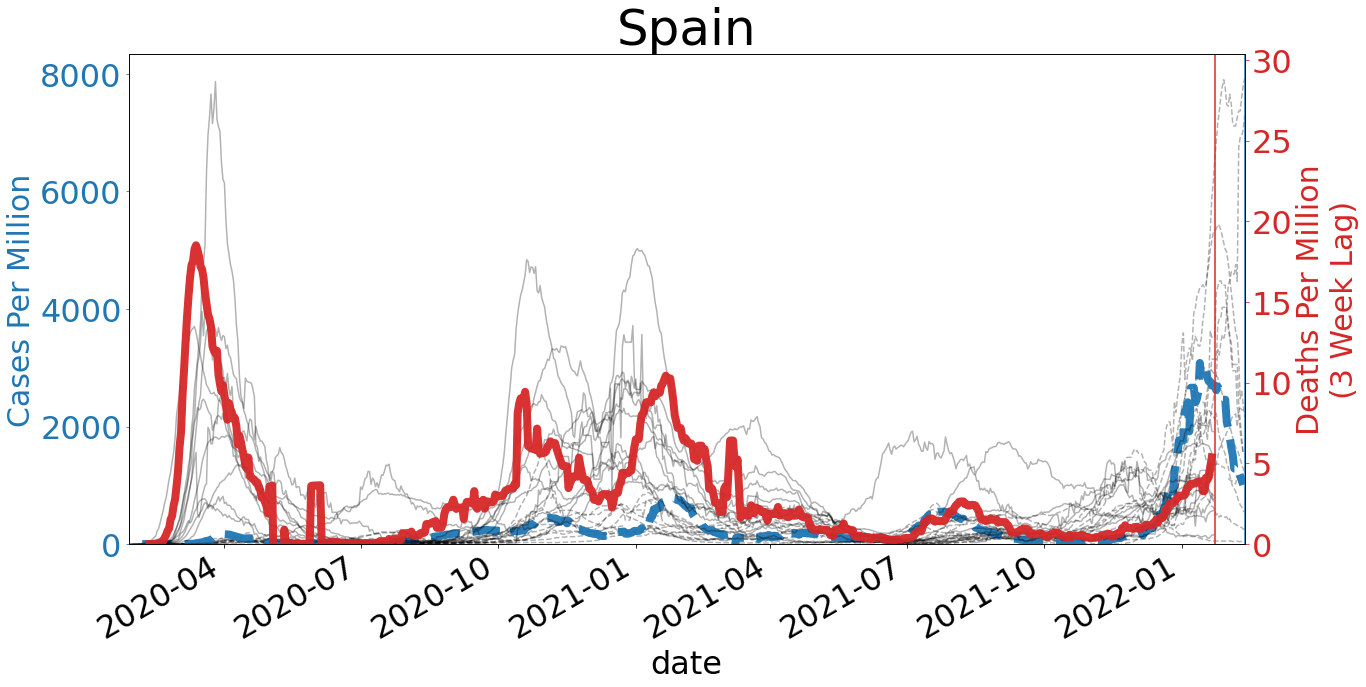

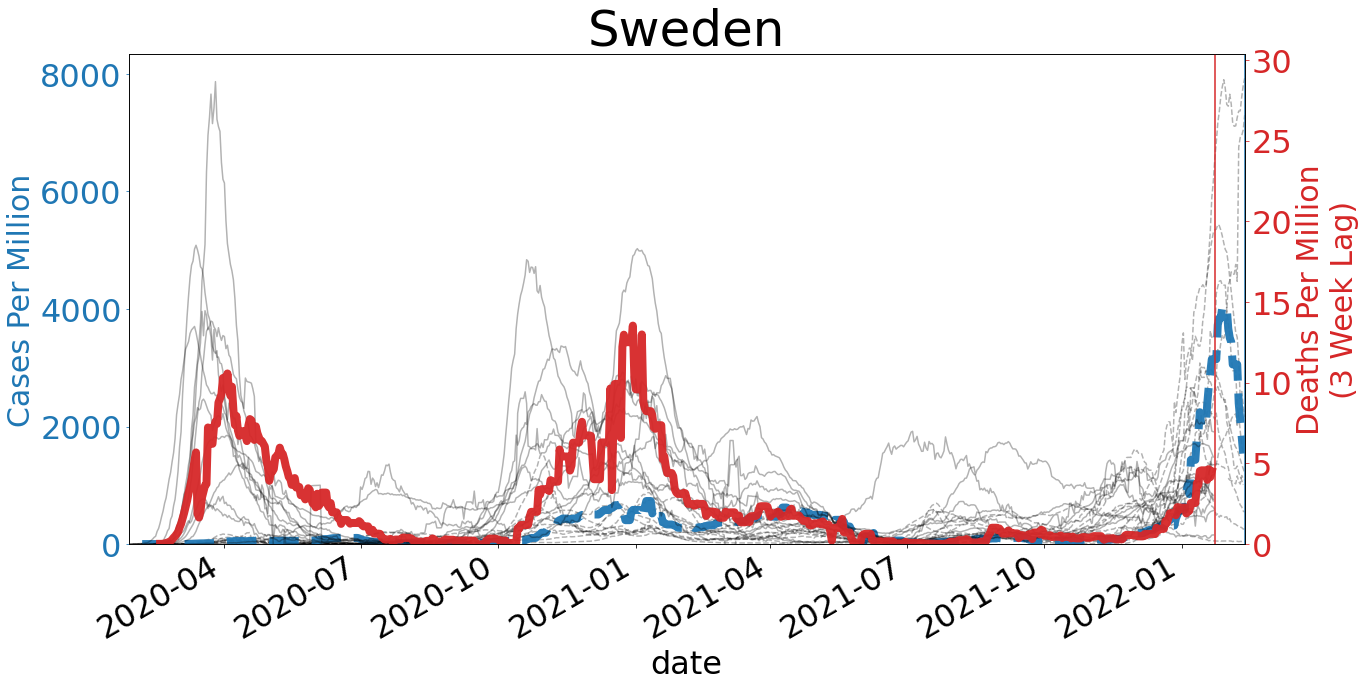

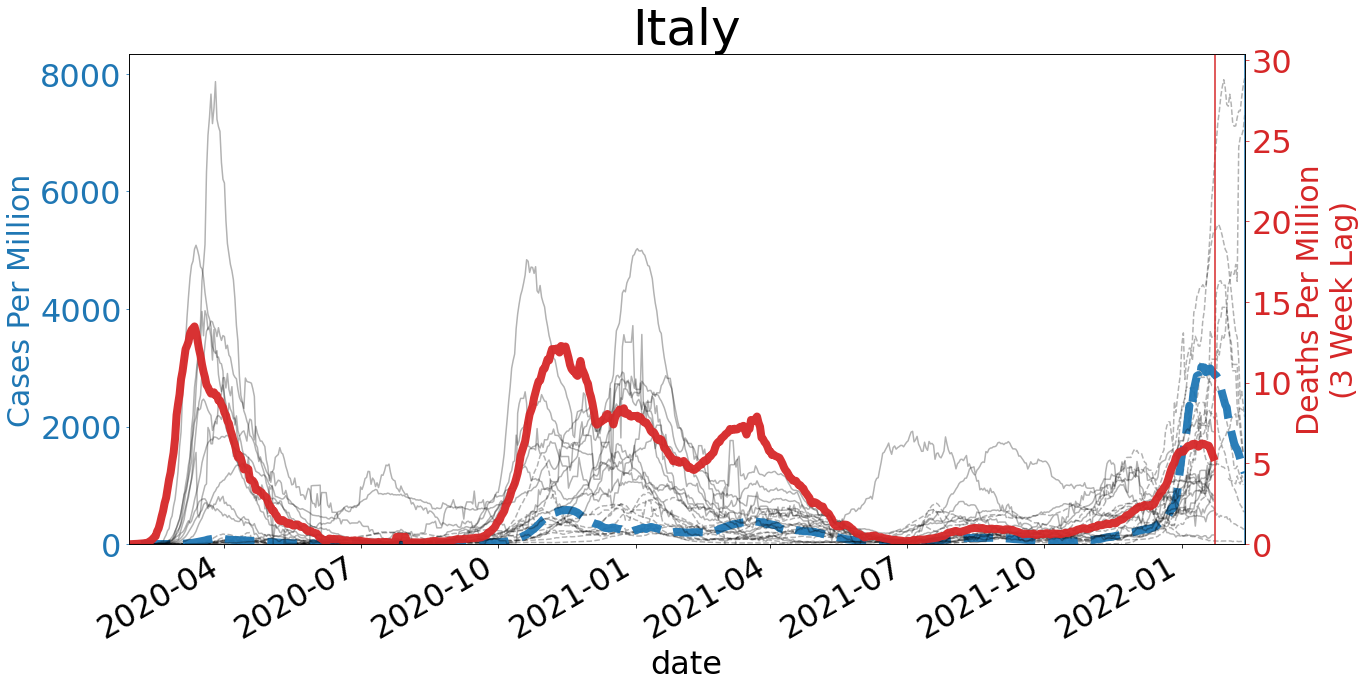

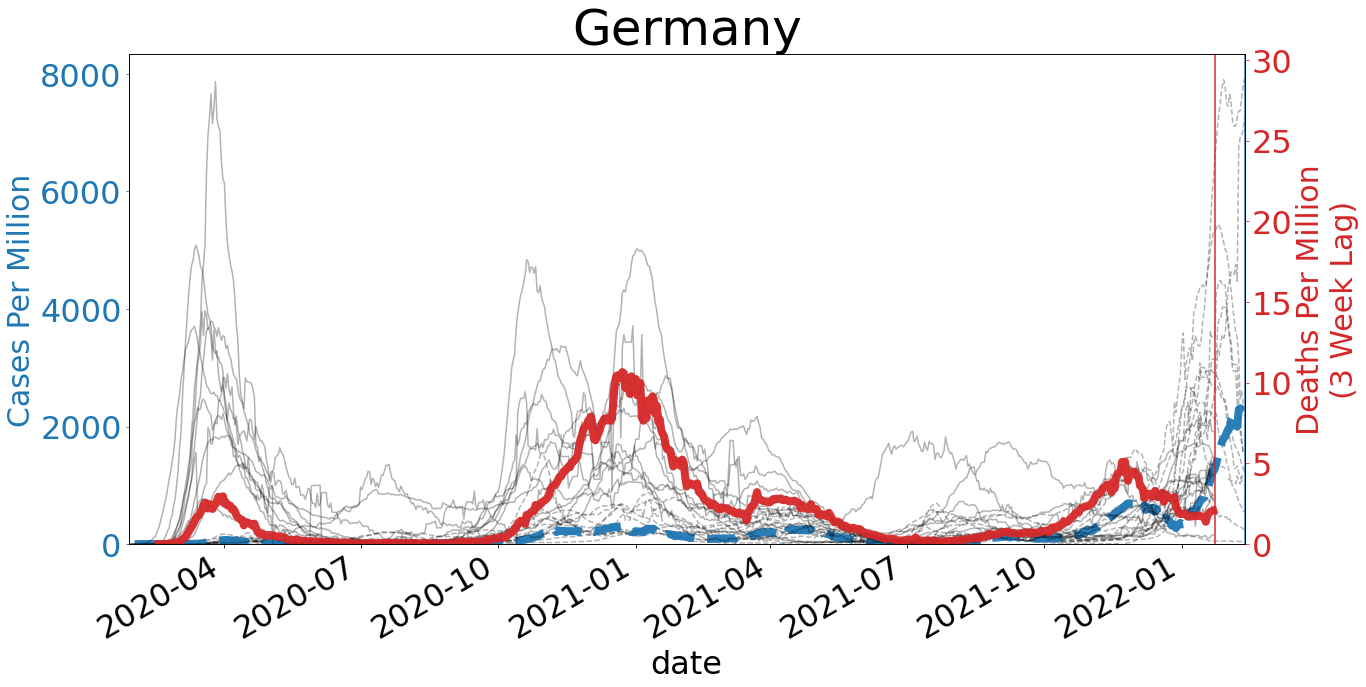

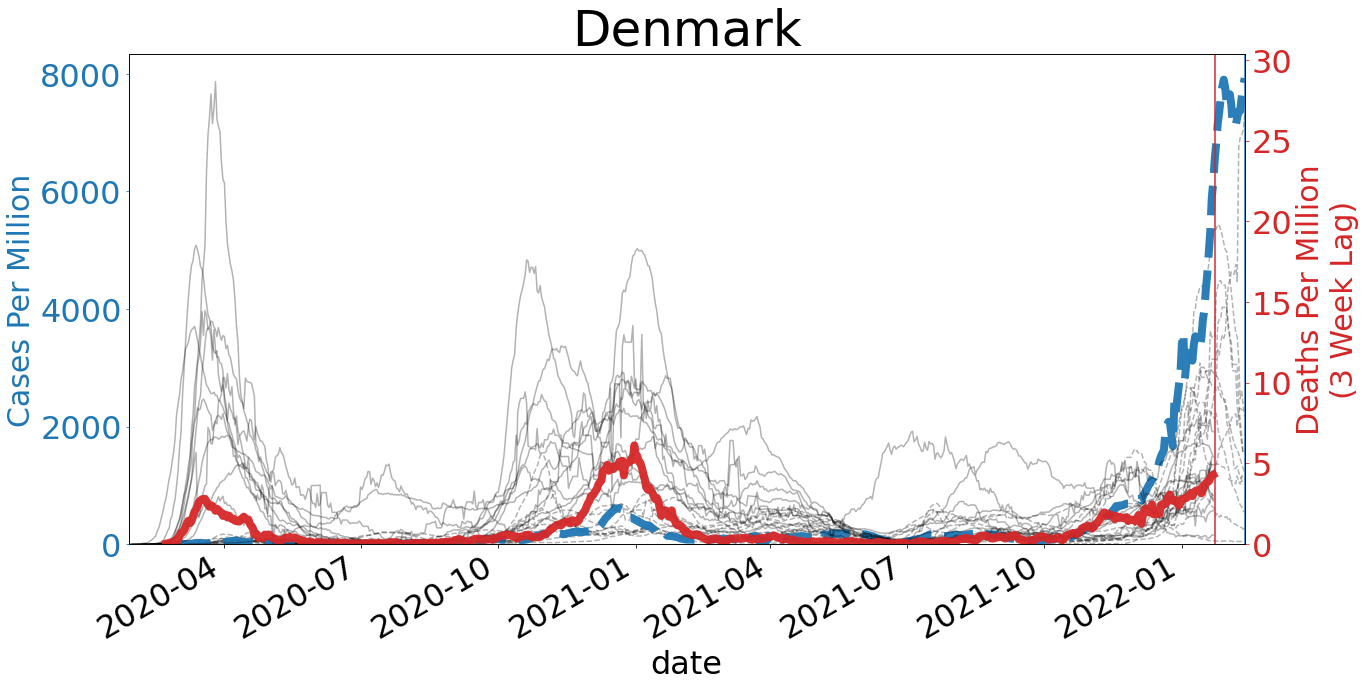

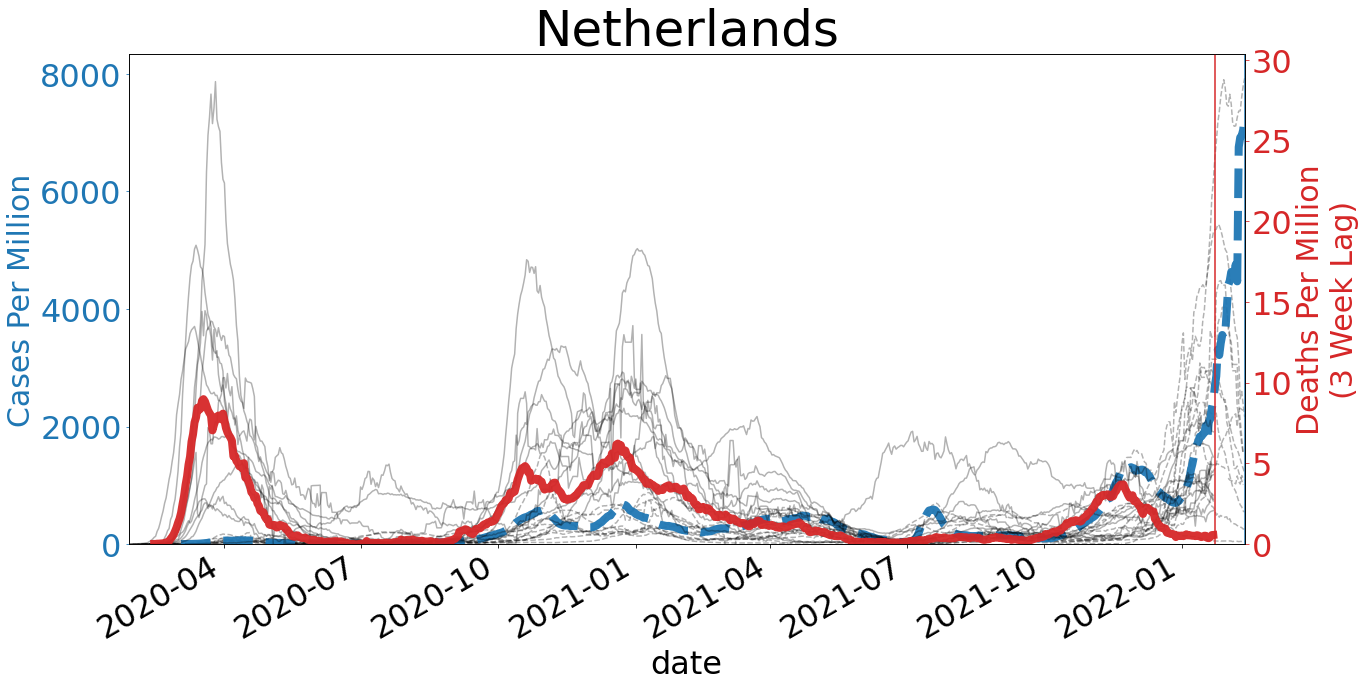

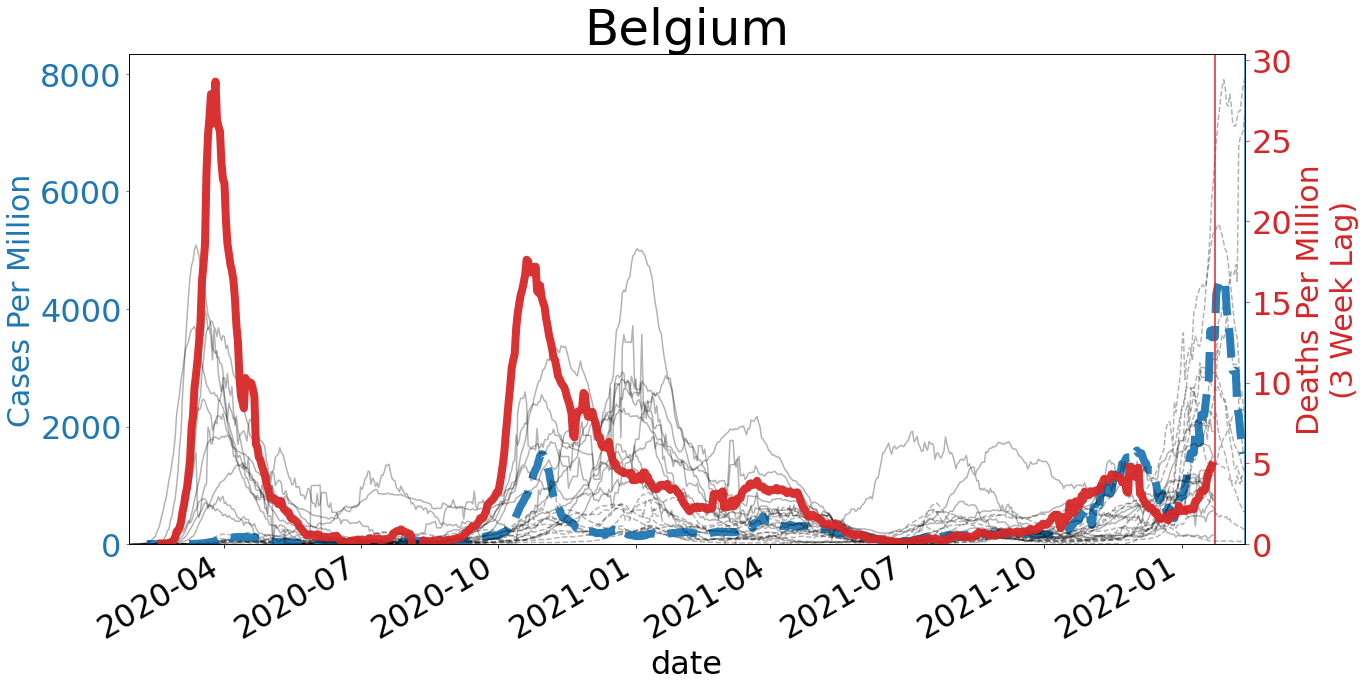

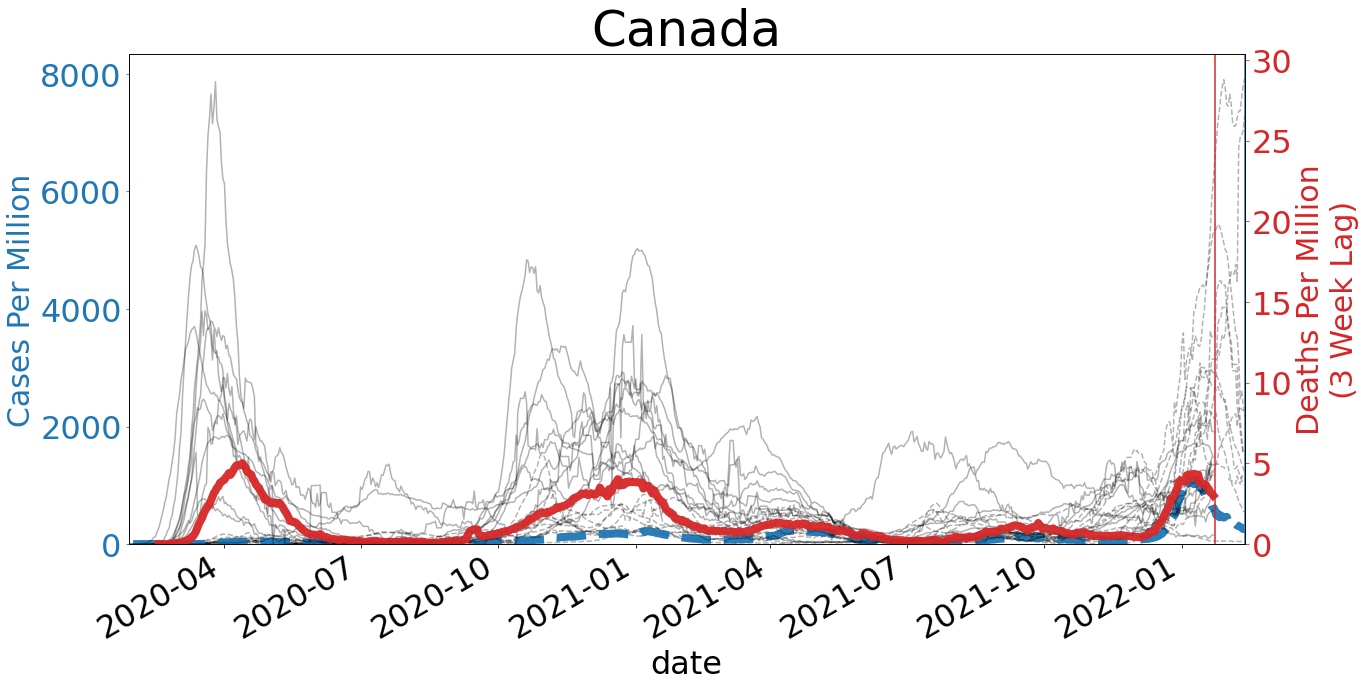

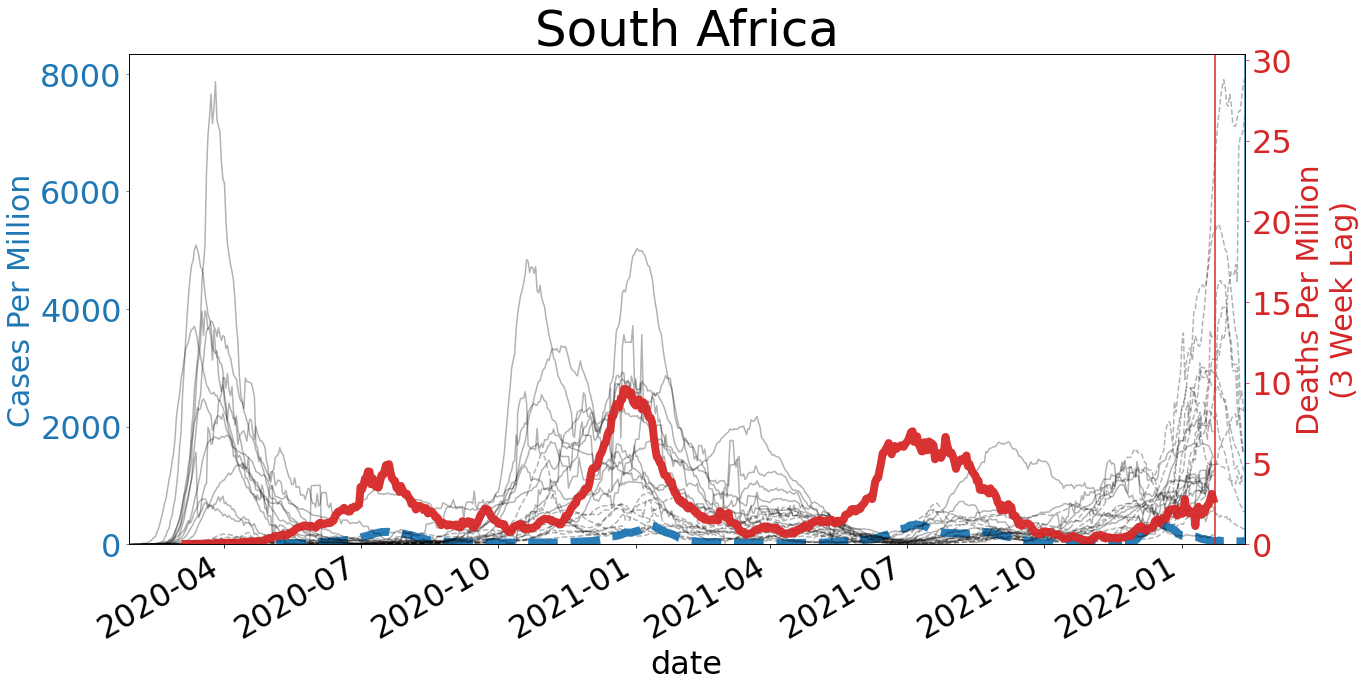

In [5]:
import copy
plt.rcParams.update({'font.size': 32})

plot_df = copy.copy(pivot_df)
plot_df["New Deaths Smoothed Per Million"] = plot_df["New Deaths Smoothed Per Million"].shift(-21)
plot_countries = ["GBR", "USA", "FRA", "ESP", "SWE", "ITA", "DEU","DNK", "NLD", "BEL", "CAN", "ZAF"]

for country in plot_countries:
    fig, ax = plt.subplots(figsize = (20, 10))
    ax.set_title(iso_to_country[country], fontsize = 50)
    ax2 = ax.twinx()
    for name in ["Cases", "Deaths"]:
        ls = "--" if name == "Cases" else "-"
        
        if name == "Deaths":
            a = ax2
        else:
            a = ax
        var_name = "New " + name + " Smoothed Per Million"
        other_countries = [c for c in plot_countries if c != country]
        plot_df[var_name][other_countries].plot.line(
            color = "k",
            alpha = .3,
            ls = ls,
            ax = a,
            legend = False)
        
    for name in ["Cases", "Deaths"]:
        var_name = "New " + name + " Smoothed Per Million"
        if name == "Deaths":
            a = ax2
            color = "C3"
            lag = "\n(3 Week Lag)"
        else:
            a = ax
            color = "C0"
            lag = ""
        ls = "--" if name == "Cases" else "-"
        plot_df[var_name][country].plot.line(
            ls = ls,
            ax=a,
            color = color,
            lw = 8,
            alpha = .95,
            legend = False)
        a.set_ylim(bottom = 0)
        a.set_ylabel(name + " Per Million" + lag, 
                     color = color,
                    fontsize = 30)
        a.tick_params(axis='y', colors=color)        
    a.axvline(plot_df[var_name][country].index[-1])
    a.axvline(plot_df[var_name][country].index[-21], color = "C3")
    a.set_xmargin(0)
    plt.show()

In [6]:
for iso, country in iso_to_country.items():
    print(country)

Aruba
Afghanistan
Angola
Anguilla
Albania
Andorra
United Arab Emirates
Argentina
Armenia
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Bonaire Sint Eustatius and Saba
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas
Bosnia and Herzegovina
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei
Bhutan
Botswana
Central African Republic
Canada
Switzerland
Chile
China
Cote d'Ivoire
Cameroon
Democratic Republic of Congo
Congo
Cook Islands
Colombia
Comoros
Cape Verde
Costa Rica
Cuba
Curacao
Cayman Islands
Cyprus
Czechia
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands
France
Faeroe Islands
Micronesia (country)
Gabon
United Kingdom
Georgia
Guernsey
Ghana
Gibraltar
Guinea
Gambia
Guinea-Bissau
Equatorial Guinea
Greece
Grenada
Greenland
Guatemala
Guyana
Hong Kong
Honduras
Croatia
Haiti
Hungary
Indonesia
Isle of Man
India
Ireland
Iran
Iraq
Iceland
Israel
Italy
Jamaica
Jersey
Jordan
Japan


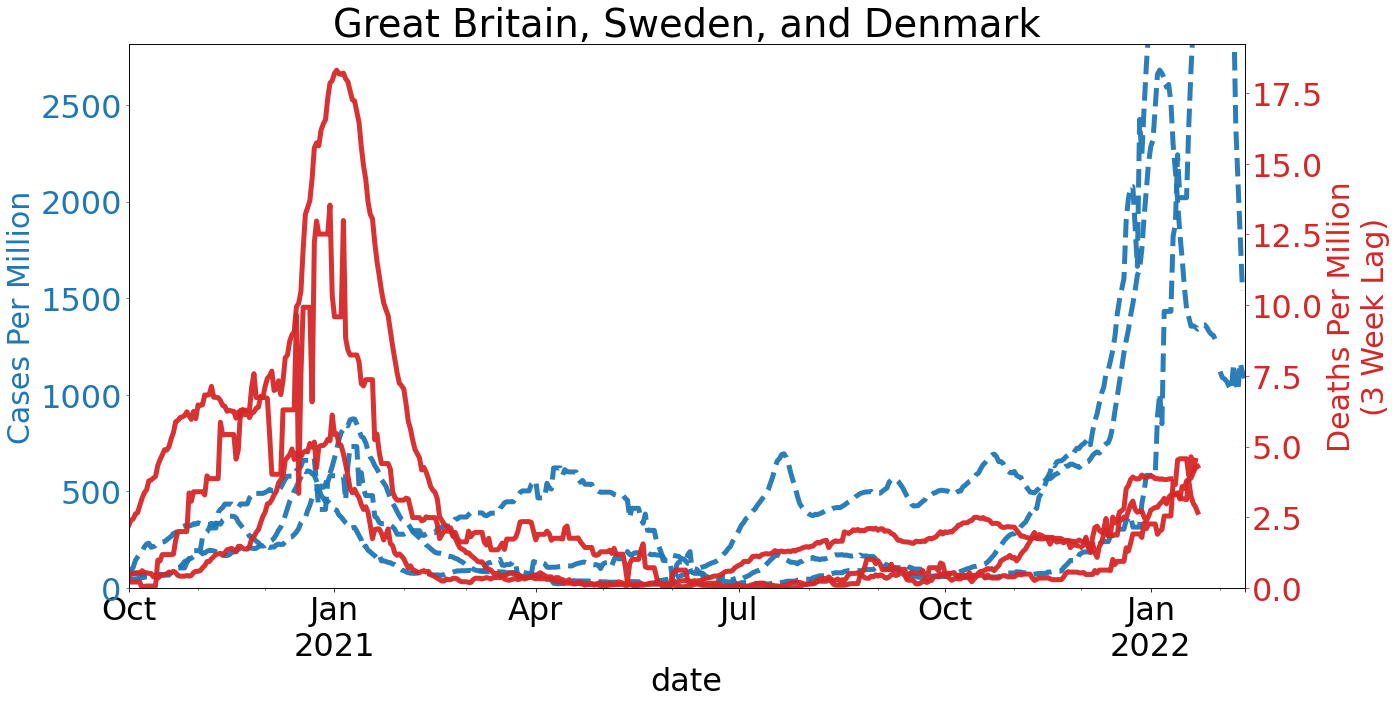

In [7]:
plot_countries = ["GBR", "SWE", "DNK"]

fig, ax = plt.subplots(figsize = (20, 10))
ax2 = ax.twinx()
for country in plot_countries:
#     ax.set_title(iso_to_country[country], fontsize = 50)
    for name in ["Cases", "Deaths"]:
        ls = "--" if name == "Cases" else "-"
        
        if name == "Deaths":
            a = ax2
        else:
            a = ax
        var_name = "New " + name + " Smoothed Per Million"
#         other_countries = [c for c in plot_countries if c != country]
#         plot_df[var_name][other_countries].plot.line(
#             color = "k",
#             alpha = .3,
#             ls = ls,
#             ax = a,
#             legend = False)
        
    for name in ["Cases", "Deaths"]:
        var_name = "New " + name + " Smoothed Per Million"
        if name == "Deaths":
            a = ax2
            color = "C3"
            lag = "\n(3 Week Lag)"
        else:
            a = ax
            color = "C0"
            lag = ""
        ls = "--" if name == "Cases" else "-"
        plot_df[var_name][country].loc["2020-10-01":].plot.line(
            ls = ls,
            ax=a,
            color = color,
            lw = 5,
            alpha = .95,
            legend = False)
        a.set_ylim(bottom = 0)
        a.set_ylabel(name + " Per Million" + lag, 
                     color = color,
                    fontsize = 30)
        a.tick_params(axis='y', colors=color)
        ax.set_xmargin(0)

ax.set_title("Great Britain, Sweden, and Denmark")
plt.show()

In [8]:
# plot_df["IRF"] = plot_df["New Deaths Smoothed Per Million"].div()
plot_df = copy.copy(pivot_df)
plot_df["IRF"] = pivot_df["New Deaths Smoothed Per Million"].copy()
pivot_df["New Deaths Smoothed Per Million"] = pivot_df["New Deaths Smoothed Per Million"].shift(-21)
plot_countries = ["GBR", "USA", "FRA", "ESP", "SWE", "ITA", "DEU","DNK", "NLD", "BEL", "CAN", "ZAF"]
for key in plot_df["New Deaths Smoothed Per Million"]:
    plot_df["IRF"][key] = plot_df["New Deaths Smoothed Per Million"][key].div(plot_df["New Cases Smoothed Per Million"][key])




(0.0, 0.12248835222147156)

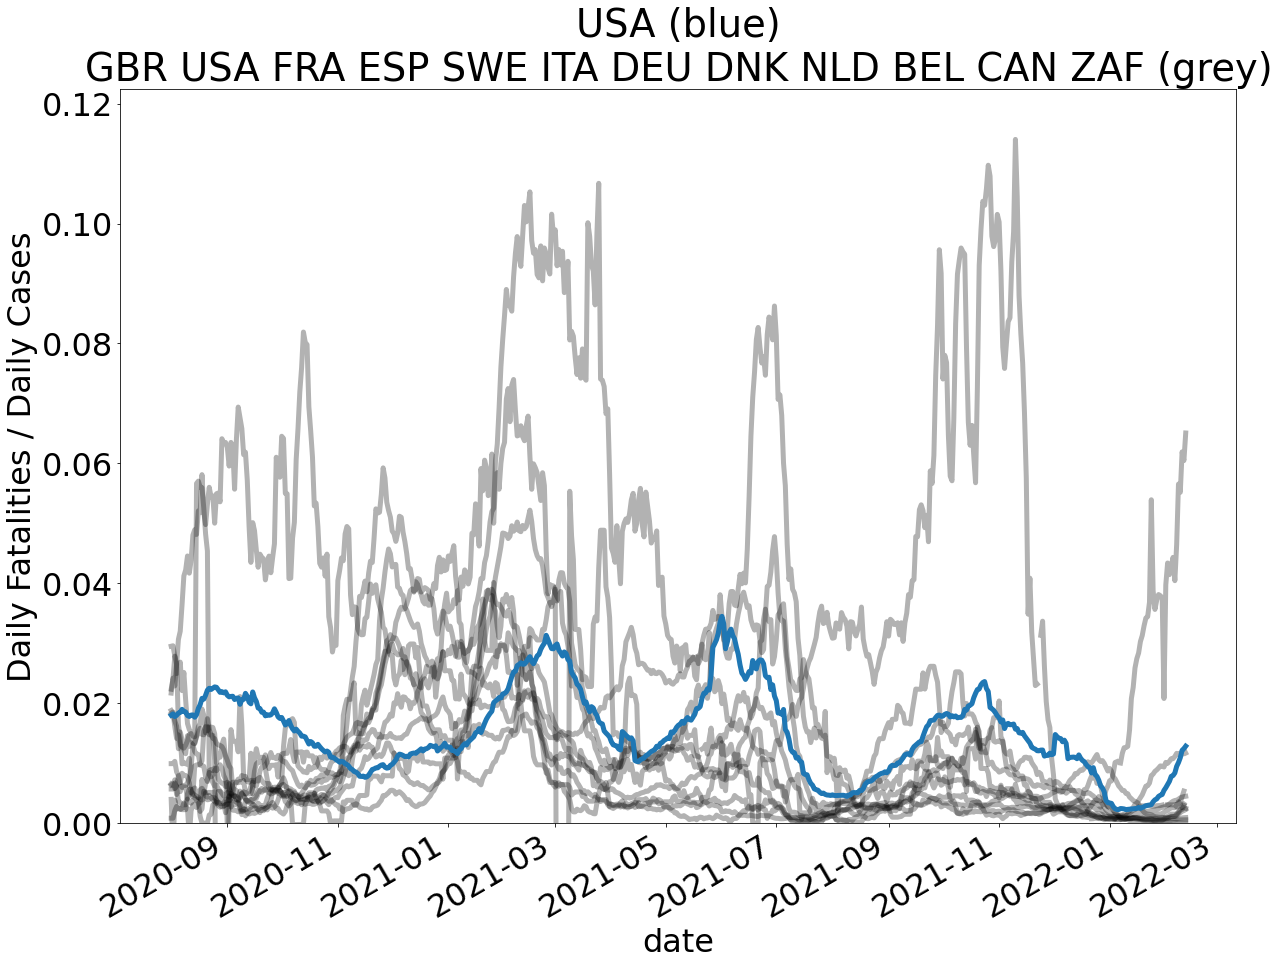

In [9]:
import datetime
fig, ax = plt.subplots(figsize =(20,15))
country = "USA"
other_countries = [c for c in plot_countries if c != country]
plot_df["IRF"].loc[datetime.datetime(2020,8,1):,other_countries].plot.line(
    color = "k",
    alpha = .3,
    linewidth = 5,
    ax = ax,
    legend = False)
plot_df["IRF"].loc[datetime.datetime(2020,8,1):,"USA"].plot(ax = ax, legend =  False,    linewidth = 5)
plt.title("USA (blue)\nGBR USA FRA ESP SWE ITA DEU DNK NLD BEL CAN ZAF (grey)")
ax.set_ylabel("Daily Fatalities / Daily Cases")
ax.set_ylim(0)
# other_countries = [c for c in plot_countries if c != country]
# plot_df[var_name][other_countries].plot.line(
#     color = "k",
#     alpha = .3,
#     ls = ls,
#     ax = a,
#     legend = False)

In [10]:
import datetime
plot_df["IRF"][datetime.datetime(2020,6,1):]

iso_code         ABW       AFG       AGO       AIA       ALB       AND  \
date                                                                     
2020-06-01       NaN  0.009882  0.000000       NaN  0.007234  0.000000   
2020-06-02       NaN  0.010709  0.000000       NaN  0.000000  0.000000   
2020-06-03       NaN  0.013920  0.000000       NaN  0.000000  0.000000   
2020-06-04       NaN  0.013156  0.000000       NaN  0.000000  0.000000   
2020-06-05       NaN  0.011868  0.000000       NaN  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2022-02-08  0.010239  0.008864  0.004796  0.013333  0.006552  0.002353   
2022-02-09  0.011538  0.010808  0.005109  0.010309  0.007149  0.002968   
2022-02-10  0.008473  0.012050  0.006126  0.013513  0.006920  0.001656   
2022-02-11  0.009388  0.012658  0.011799  0.013513  0.008054  0.001849   
2022-02-12  0.014925  0.014191  0.011662  0.013513  0.008221  0.001849   

iso_code         ARE       ARG       ARM       ATG  ...       VCT       VEN  \
date                                                ...                       
2020-06-01  0.003679  0.018606  0.021860  0.000000  ...       NaN  0.014499   
2020-06-02  0.003406  0.016680  0.025702  0.000000  ...       NaN  0.011566   
2020-06-03  0.003409  0.015558  0.026179  0.000000  ...       NaN  0.012788   
2020-06-04  0.003336  0.018184  0.020964  0.000000  ...       NaN  0.011867   
2020-06-05  0.003128  0.019945  0.020056  0.000000  ...       NaN  0.007778   
...              ...       ...       ...       ...  ...       ...       ...   
2022-02-08  0.001517  0.007780  0.001987  0.017699  ...  0.024389  0.004001   
2022-02-09  0.001668  0.007951  0.002181  0.033058  ...  0.029267  0.004254   
2022-02-10  0.001987  0.008399  0.002835  0.011885  ...  0.029267  0.004924   
2022-02-11  0.002094  0.008789  0.003695  0.011686  ...  0.055043  0.005278   
2022-02-12  0.001945  0.009289  0.004389  0.011686  ...  0.027525  0.005767   

iso_code         VGB       VNM  VUT  WLF       YEM       ZAF       ZMB  \
date                                                                     
2020-06-01       NaN       NaN  NaN  NaN  0.329806  0.020855  0.000000   
2020-06-02       NaN       NaN  NaN  NaN  0.253201  0.020017  0.000000   
2020-06-03       NaN       NaN  NaN  NaN  0.256510  0.020710  0.000000   
2020-06-04       NaN       NaN  NaN  NaN  0.263415  0.020247  0.000000   
2020-06-05       NaN       NaN  NaN  NaN  0.247991  0.020935  0.000000   
...              ...       ...  ...  ...       ...       ...       ...   
2022-02-08  0.037734  0.007922  NaN  NaN  0.152278  0.056539  0.006243   
2022-02-09  0.169810  0.007668  NaN  NaN  0.154375  0.055167  0.006207   
2022-02-10       inf  0.004940  NaN  NaN  0.158996  0.061914  0.004557   
2022-02-11       inf  0.004502  NaN  NaN  0.151578  0.060462  0.003554   
2022-02-12  0.144928  0.003839  NaN  NaN  0.147534  0.065062  0.003580   

iso_code         ZWE  
date                  
2020-06-01  0.000000  
2020-06-02  0.000000  
2020-06-03  0.000000  
2020-06-04  0.000000  
2020-06-05  0.000000  
...              ...  
2022-02-08  0.021214  
2022-02-09  0.020607  
2022-02-10  0.018336  
2022-02-11  0.016292  
2022-02-12  0.013426  

[622 rows x 218 columns]